## Importing libraries and loading train/test data

In [245]:
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, roc_auc_score, f1_score, classification_report, recall_score
from sklearn.ensemble import RandomForestClassifier

In [2]:
train = pd.read_csv('mushroom_train.csv')
test=pd.read_csv('mushroom_test.csv')
train_y= train['class_poisonous']
train_x= train.drop(['class_poisonous'], axis=1)
test_y= test['class_poisonous']
test_x = test.drop(['class_poisonous'], axis=1)

In [3]:
train.columns

Index(['class_poisonous', 'cap-shape_bell', 'cap-shape_conical',
       'cap-shape_convex', 'cap-shape_flat', 'cap-shape_knobbed',
       'cap-shape_sunken', 'cap-surface_fibrous', 'cap-surface_grooves',
       'cap-surface_scaly',
       ...
       'population_scattered', 'population_several', 'population_solitary',
       'habitat_grasses', 'habitat_leaves', 'habitat_meadows', 'habitat_paths',
       'habitat_urban', 'habitat_waste', 'habitat_woods'],
      dtype='object', length=116)

In [4]:
print('Shape of training Dependent data ', train_x.shape, 'Shape of training Independent data ', train_y.shape )
print('Shape of testing Dependent data ', test_x.shape, 'Shape of testing Independent data ', test_y.shape )

Shape of training Dependent data  (5686, 115) Shape of training Independent data  (5686,)
Shape of testing Dependent data  (2438, 115) Shape of testing Independent data  (2438,)


## Fitting Models

### Logistic Regression
Let's fit the model on a simple logistic regression model with default parameters.

In [187]:
rModel = linear_model.LogisticRegression(C=1)

In [188]:
model = rModel.fit(train_x, train_y)

In [189]:
y_pred= model.predict(test_x)

In [190]:
print('Logistic Regression Performance')
print('Accuracy: ', accuracy_score(test_y,y_pred))
print('Precision: ',precision_score(test_y,y_pred))
print('Recall: ',recall_score(test_y,y_pred))
print('ROC_AUC_Score: ', roc_auc_score(test_y,y_pred))

Logistic Regression Performance
Accuracy:  0.9983593109105825
Precision:  1.0
Recall:  0.9965986394557823
ROC_AUC_Score:  0.9982993197278911


The model seems to be classifying most of the mushrooms accurately!
Let's plot a confusion matrix to confirm the same.

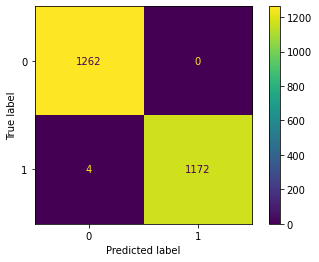

In [191]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rModel, test_x, test_y)

We have four false negatives predicted by our model.
It means that four mushrooms were predicted to be edible in fact they were poisonous.

##### We need to reduce the false negatives in our case as they might result in a poisonous mushroom slipping through as edible.
##### There is also a possibility of data leakage as we are getting a high accuracy.

### Random Forest Classifier

Let's try fitting the Random Forest Classifier with default parameters on the training data.

In [294]:
RFC =RandomForestClassifier()

In [307]:
RFC_model = RFC.fit(train_x, train_y)

In [308]:
y_pred = RFC_model.predict(test_x)

In [297]:
print('Random Forest Classifier Performance')
print('Accuracy: ', accuracy_score(test_y,y_pred))
print('Precision: ',precision_score(test_y,y_pred))
print('Recall: ',recall_score(test_y,y_pred))
print('ROC_AUC_Score: ', roc_auc_score(test_y,y_pred))

Random Forest Classifier Performance
Accuracy:  1.0
Precision:  1.0
Recall:  1.0
ROC_AUC_Score:  1.0


Random Forest seems to be giving 100% results!

Plotting confusion matrix for Random Forest model.

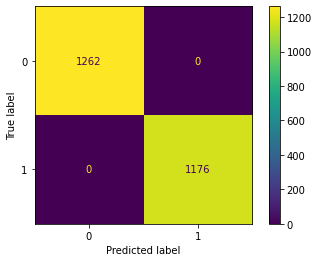

In [251]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(RFC, test_x, test_y)

All the mushrooms are correctly classified by the model.

Considering both Random Forest and Logistic regression are giving close to 100% accuracy, there is a very high possibility of data leakage. <br>

We have to select the features that are a clear indication of a mushroom being poisonous.

## Feature Selection

Since we are getting an accuracy of 100% in both the models trained, there is data leakage happening.

Let's select the best features in order to find out which features are acting as identifiers.

### Feature Selection for Logistic Regression model

Let's do a Recursive Feature Elimination and find out which features are giving the best results. <br>
This will be done through a loop where we are setting the number of parameters from 1 to 114 from the data

In [200]:
from sklearn.feature_selection import RFE
recall = []
features =[]
for i in range(1,115):
    rfe =RFE(rModel,i)
    rfe_model = rfe.fit(train_x,train_y)
    columns = np.array(train_x.columns)
    best_columns =[]
    for i in range(train_x.shape[1]):
        if rfe.support_[i] == True:
            #print(columns[i])
            best_columns.append(columns[i])
    predicted_y = rModel.fit(train_x[best_columns],train_y).predict(test_x[best_columns])
    score = recall_score(test_y, predicted_y)
    recall.append(score)
    features.append(i)
#print(rfe.support_)
#print(rfe.ranking_)

C:\Users\B.K.M.Bhat\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass n_features_to_select=1 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
C:\Users\B.K.M.Bhat\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass n_features_to_select=2 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
C:\Users\B.K.M.Bhat\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass n_features_to_select=3 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
C:\Users\B.K.M.Bhat\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass n_features_to_select=4 as keyword args. From version 1.0 (

C:\Users\B.K.M.Bhat\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass n_features_to_select=31 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
C:\Users\B.K.M.Bhat\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass n_features_to_select=32 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
C:\Users\B.K.M.Bhat\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass n_features_to_select=33 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
C:\Users\B.K.M.Bhat\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass n_features_to_select=34 as keyword args. From version 1

C:\Users\B.K.M.Bhat\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass n_features_to_select=61 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
C:\Users\B.K.M.Bhat\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass n_features_to_select=62 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
C:\Users\B.K.M.Bhat\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass n_features_to_select=63 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
C:\Users\B.K.M.Bhat\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass n_features_to_select=64 as keyword args. From version 1

C:\Users\B.K.M.Bhat\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass n_features_to_select=91 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
C:\Users\B.K.M.Bhat\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass n_features_to_select=92 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
C:\Users\B.K.M.Bhat\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass n_features_to_select=93 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
C:\Users\B.K.M.Bhat\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass n_features_to_select=94 as keyword args. From version 1

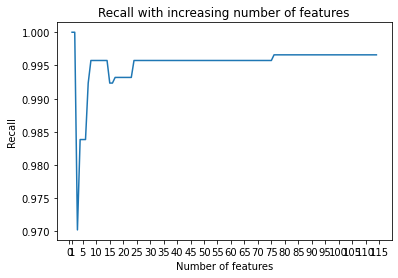

In [213]:
plt.plot([i for i in range(1,115)],recall)
plt.title('Recall with increasing number of features')
plt.xlabel('Number of features')
plt.ylabel('Recall')
plt.xticks([0,1,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,105,110,115])
plt.show()

It is interesting to see the recall being 1 with 1 feature and then dropping down later. <br>

It's time to find out the reason behind this.

In [218]:
recall[0]

1.0

Finding out that one feature that can act as a sole predictor of poisonous mushrooms.

Also on how the other performance metrics are impacted.

C:\Users\B.K.M.Bhat\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass n_features_to_select=1 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


['odor_anise'] is the feature used
Accuracy Score:  0.5278917145200984
Precision:  0.5053717232488182
Recall:  1.0
ROC_AUC_Score:  0.5439778129952457


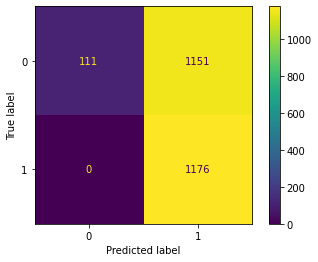

In [240]:
from sklearn.feature_selection import RFE
rfe = RFE(rModel,1)
rfe_model = rfe.fit(train_x,train_y)
columns = np.array(train_x.columns)
best_columns =[]
for i in range(train_x.shape[1]):
    if rfe.support_[i] == True:
        
        best_columns.append(columns[i])
predicted_y = (rModel.fit(train_x[best_columns],train_y)).predict(test_x[best_columns])
print(best_columns, 'is the feature used to train Logistic Regression model')
print('Accuracy Score: ' ,accuracy_score(test_y, predicted_y))
print('Precision: ' ,precision_score(test_y,predicted_y))
print('Recall: ',recall_score(test_y, predicted_y))
print('ROC_AUC_Score: ',roc_auc_score(test_y, predicted_y))
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rModel, test_x[best_columns], test_y)

##### Is Odor Anise is acting as a sole indicator for a mushroom being poisonous? 

Using Odor Anise alone, we are able to capture all the poisonous mushrooms.<br>
However using it as the sole metric is resulting in a sizeable number of edible mushrooms being classified as poisonous.<br>
This can cause a significant loss.

##### Reason: <br>
It was noted in the EDA that all mushrooms with Anise odor were edible. The model is classifying all these as edible and the rest as poisonous. Hence we are able to classify all the poisonous mushrooms correctly at a significant cost of edible mushrooms. <br> 

Let's now try to find how we are getting a recall of 1 for 2 features

C:\Users\B.K.M.Bhat\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass n_features_to_select=2 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


odor_almond
odor_anise
Accuracy:  0.579163248564397
Precision:  0.5340599455040872
Recall:  1.0
ROC_AUC_Score 0.5935023771790808


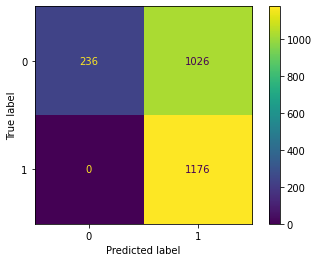

In [232]:
rfe = RFE(rModel,2)
rfe_model = rfe.fit(train_x,train_y)
columns = np.array(train_x.columns)
best_columns =[]
for i in range(train_x.shape[1]):
    if rfe.support_[i] == True:
        print(columns[i])
        best_columns.append(columns[i])
predicted_y = (rModel.fit(train_x[best_columns],train_y)).predict(test_x[best_columns])
print('Accuracy: ',accuracy_score(test_y, predicted_y))
print('Precision: ',precision_score(test_y,predicted_y))
print('Recall: ',recall_score(test_y, predicted_y))
print('ROC_AUC_Score', roc_auc_score(test_y, predicted_y))
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rModel, test_x[best_columns], test_y)

Odor Anise and Almond combined can give us a recall of 100% but at a significant cost of edible mushrooms.

C:\Users\B.K.M.Bhat\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass n_features_to_select=3 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


The 3 best predictors are:  ['odor_almond', 'odor_anise', 'odor_none']
Accuracy:  0.9856439704675964
Precision:  1.0
Recall:  0.9702380952380952
ROC_AUC_Score:  0.9851190476190477


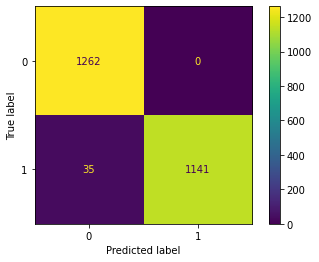

In [236]:
rfe = RFE(rModel,3)
rfe_model = rfe.fit(train_x,train_y)
columns = np.array(train_x.columns)
best_columns =[]
for i in range(train_x.shape[1]):
    if rfe.support_[i] == True:
        
        best_columns.append(columns[i])
print('The 3 best predictors are: ',best_columns)
predicted_y = (rModel.fit(train_x[best_columns],train_y)).predict(test_x[best_columns])
print('Accuracy: ',accuracy_score(test_y, predicted_y))
print('Precision: ',precision_score(test_y,predicted_y))
print('Recall: ', recall_score(test_y, predicted_y))
print('ROC_AUC_Score: ',roc_auc_score(test_y, predicted_y))
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rModel, test_x[best_columns], test_y)

Interestingly when three of the odors are introduced the model classifies 35 mushrooms as edible when they are actually poisonous.

This is causing a dip in recall as seen on the graph previously.

However, it is classifying all the edible mushrooms correctly causing a hike in the accuracy.


#### On the graph it was seen that there was an increase in recall till 8 features and no significant increase seen after that.
Hence fitting the model on the 8 best features chosen.

C:\Users\B.K.M.Bhat\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass n_features_to_select=8 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


The 8 best predictors are:  ['odor_almond', 'odor_anise', 'odor_foul', 'odor_none', 'gill-size_narrow', 'stalk-surface-above-ring_silky', 'stalk-color-below-ring_yellow', 'spore-print-color_green']
Accuracy:  0.9979491386382281
Precision:  1.0
Recall:  0.9957482993197279
ROC_AUC_Score:  0.997874149659864


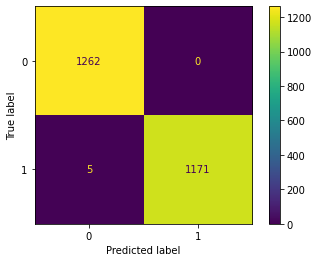

In [237]:
rfe = RFE(rModel,8)
rfe_model = rfe.fit(train_x,train_y)
columns = np.array(train_x.columns)
best_columns =[]
for i in range(train_x.shape[1]):
    if rfe.support_[i] == True:
        
        best_columns.append(columns[i])
print('The 8 best predictors are: ',best_columns)
predicted_y = (rModel.fit(train_x[best_columns],train_y)).predict(test_x[best_columns])
print('Accuracy: ',accuracy_score(test_y, predicted_y))
print('Precision: ',precision_score(test_y,predicted_y))
print('Recall: ', recall_score(test_y, predicted_y))
print('ROC_AUC_Score: ',roc_auc_score(test_y, predicted_y))
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rModel, test_x[best_columns], test_y)

When 8 features are chosen, the model's performance is close to all the 115 features chosen.

Also the number of misclassified poisonous mushrooms has come down from 35(seen with 5 features) to 5.

### Feature Selection for Random Forest model

Let's select the best features for random forest.

First of all let's choose the minimum number of trees required to get 100% results.

In [287]:
rfc = RandomForestClassifier() 
estimators = [5,7,10,25,50]
gridsearch_rf= GridSearchCV(rfc, param_grid = {'n_estimators': estimators}, cv =5, n_jobs =-1, scoring= 'recall')

In [288]:
rfc_model =gridsearch_rf.fit(train_x,train_y)

In [289]:
print(rfc_model.best_params_,rfc_model.best_score_)

{'n_estimators': 5} 1.0


The model can give the best recall at 5 trees only.
Let's find the best features by fitting random forest model on 5 decision trees.

In [325]:
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(RandomForestClassifier(n_estimators = 5))
model = sel.fit(train_x, train_y)
best_features = train_x.columns[model.get_support()]
print('The Best features: ' , best_features)
print('Total number of features:', len(best_features))


The Best features:  Index(['cap-color_buff', 'bruises_no', 'odor_anise', 'odor_none',
       'odor_pungent', 'gill-spacing_crowded', 'gill-size_broad',
       'gill-size_narrow', 'stalk-root_bulbous', 'stalk-root_club',
       'stalk-surface-above-ring_smooth', 'stalk-surface-below-ring_silky',
       'ring-type_pendant', 'spore-print-color_chocolate',
       'spore-print-color_green', 'population_abundant', 'population_several',
       'habitat_paths', 'habitat_urban'],
      dtype='object')
Total number of features: 19


In [326]:
rfc = RandomForestClassifier(n_estimators = 5)
model = rfc.fit(train_x[best_features], train_y)

In [328]:
y_pred = model.predict(test_x[best_features])

Random Forest Performance with 5 estimators and 19 features
Accuracy:  1.0
Precision:  1.0
Recall:  1.0
ROC_AUC_Score:  1.0


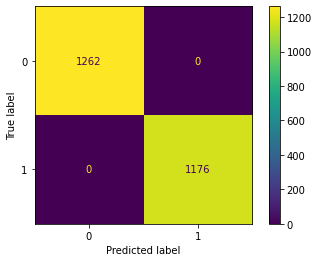

In [330]:
print('Random Forest Performance with 5 estimators and 19 features')
print('Accuracy: ',accuracy_score(test_y, y_pred))
print('Precision: ',precision_score(test_y,y_pred))
print('Recall: ', recall_score(test_y, y_pred))
print('ROC_AUC_Score: ',roc_auc_score(test_y, y_pred))
plot_confusion_matrix(model, test_x[best_features], test_y)

Random Forest model is giving a 100% classification using 19 of the features and 5 estimator trees.

## Observations and Conclusion:

The Logistic Regression model can give upto 99.5% Recall using 8 features only.
However it is classifying 5 of the poisonous mushrooms as edible. This can have a serious impact.

The Random forest Classifier can give a 100% Recall and an ROC_AUC of 1 using 19 features when 5 trees are used. <br>
Hence this Random Forest model is better for identifying the poisonous mushrooms.

It's evident that odor is the main differentiator that can identify a majority of poisonous mushrooms.
It can be combined with gill size, stalk surface and spore prints to improve the performance of the models.
